# Read Dataset

In [50]:
from warnings import filterwarnings
filterwarnings("ignore")

In [51]:
import pandas as pd
A = pd.read_csv("Desktop/Vaibhav/Datasets/Cars93.csv")

In [52]:
A.head(2)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend


# Missing Data treatment

In [53]:
from PM8wd import replacer
replacer(A)

# Define X and standardize

In [54]:
X = A[["MPG.city","Price"]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=["MPG.city","Price"])

# Clusters

In [55]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(Xnew)

In [56]:
model.labels_

array([1, 0, 3, 0, 3, 1, 3, 3, 3, 0, 0, 1, 1, 3, 1, 3, 3, 3, 0, 3, 1, 3,
       2, 1, 1, 3, 1, 3, 2, 3, 2, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 0, 3, 0, 0, 0, 2, 2, 1, 3, 0, 0, 0, 1, 3, 2, 3, 2, 1, 3,
       3, 1, 1, 3, 3, 1, 2, 1, 3, 3, 3, 3, 2, 2, 1, 1, 2, 2, 1, 1, 3, 1,
       3, 3, 3, 3, 3], dtype=int32)

# Add the labels in a new column in X

In [57]:
X["cluster"]=model.labels_

In [58]:
X["Make"]=A.Make

In [59]:
X.head(3)

,MPG.city,Price,cluster,Make
0,25,15.9,1,Acura Integra
1,18,33.9,0,Acura Legend
2,20,29.1,3,Audi 90


In [60]:
X.cluster.value_counts()

3    35
1    30
2    16
0    12
Name: cluster, dtype: int64

In [39]:
a = input("Enter your favourite car: ")
#recommended cars
q = X[X['Make']==a].cluster.values[0]
r = X[X.cluster == q].Make.values
print("Your similar cars: ")
print(r)

Enter your favourite car: Chevrolet Camaro
Your similar cars: 
['Acura Integra' 'Buick Century' 'Chevrolet Cavalier' 'Chevrolet Corsica'
 'Chevrolet Camaro' 'Chevrolet Lumina' 'Chrysler LeBaron' 'Dodge Shadow'
 'Dodge Spirit' 'Dodge Dynasty' 'Ford Escort' 'Ford Tempo' 'Ford Mustang'
 'Ford Probe' 'Honda Prelude' 'Honda Accord' 'Hyundai Elantra'
 'Hyundai Scoupe' 'Hyundai Sonata' 'Mazda 626' 'Mercury Capri'
 'Mercury Cougar' 'Nissan Altima' 'Oldsmobile Achieva'
 'Oldsmobile Cutlass_Ciera' 'Plymouth Laser' 'Pontiac Sunbird'
 'Subaru Loyale' 'Subaru Legacy' 'Toyota Celica' 'Toyota Camry'
 'Volkswagen Fox']


# Increase clusters

In [41]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10)
model = km.fit(Xnew)
X["cluster"]=model.labels_
X["Make"]=A.Make

a = input("Enter your favourite car: ")
#recommended cars
q = X[X['Make']==a].cluster.values[0]
r = X[X.cluster == q].Make.values
print("Your similar cars: ")
print(r)

Enter your favourite car: Mazda 626
Your similar cars: 
['Acura Integra' 'Buick Century' 'Chrysler LeBaron' 'Dodge Spirit'
 'Ford Mustang' 'Ford Probe' 'Honda Prelude' 'Honda Accord' 'Mazda 626'
 'Mercury Capri' 'Nissan Altima' 'Oldsmobile Cutlass_Ciera'
 'Plymouth Laser' 'Subaru Legacy' 'Toyota Celica' 'Toyota Camry']


# Elbow curve

In [48]:
k = range(2,40,1)
WCSS = []
for i in k:
    km = KMeans(n_clusters=i)
    model = km.fit(Xnew)
    WCSS.append(model.inertia_)

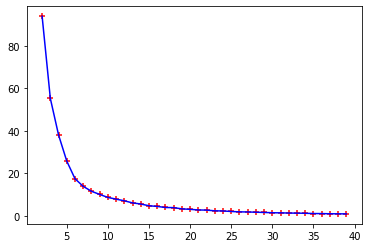

In [49]:
import matplotlib.pyplot as plt

plt.scatter(k,WCSS,c="red",marker="+")
plt.plot(k,WCSS,c="blue")